~~Download [SpaceNet utils](https://github.com/SpaceNetChallenge/utilities.git)~~

In [1]:
#!if [ ! -d "../common/spacenet_utils" ]; then cd ../common; git clone https://github.com/SpaceNetChallenge/utilities.git spacenet_utils; fi

In [2]:
# import sys 
# sys.path.append("../common/spacenet_utils/python/")
# from spaceNet import geoTools as gT

In [3]:
import numpy as np

batch_size = 32 
val_tiles = [None]*480

n = len(val_tiles)
n_batches = n // batch_size
random_indices = np.arange(n)
np.random.shuffle(random_indices)
for i in range(n_batches):
    end = min((i+1)*batch_size, n) 
    batch_indices = random_indices[batch_size*i:end]
    print end, len(batch_indices)


32 32
64 32
96 32
128 32
160 32
192 32
224 32
256 32
288 32
320 32
352 32
384 32
416 32
448 32
480 32


In [11]:
x = np.random.rand(10)
x[0] = 0; x[3] = 0

y = 1.0/(x+0.0001)
y

array([  1.00000000e+04,   1.20105290e+00,   1.03238896e+00,
         1.00000000e+04,   5.62275759e+00,   2.46626489e+00,
         5.88881405e+00,   1.28815874e+00,   1.93606691e+02,
         1.94755102e+00])

Test pansharpen

In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../common/")
from data_utils import get_filename

In [6]:
import os
from gdal_pansharpen import gdal_pansharpen

DATA_16_BANDS='../input/sixteen_band/'
GENERATED_DATA_16_BANDS = "../input/generated/"

In [19]:
len(list(os.listdir(GENERATED_DATA_16_BANDS))), len(list(os.listdir(DATA_16_BANDS))), 

(76, 1351)

In [ ]:
import logging

# GDAL
from gdal_pansharpen import gdal_pansharpen

def generate_pansharpened(image_id, image_type):
    """
    Method to create pansharpened images from multispectral or swir images
    Created file is placed in GENERATED_DATA_16_BANDS folder
    
    :image_type: 'ms' or 'swir'
    """
    outfname = get_filename(image_id, image_type + '_pan')
    if os.path.exists(outfname):
        logging.warn("File '%s' is already existing" % outfname)
        return 
    
    fname = get_filename(image_id, image_type)
    fname_pan = get_filename(image_id, 'pan')
    gdal_pansharpen(['', fname_pan, fname, outfname])    

In [39]:
if not os.path.exists(GENERATED_DATA_16_BANDS):
    os.mkdir(GENERATED_DATA_16_BANDS)


fname_pan, fname_ms, fname_swir = [None, None, None]
for fname in os.listdir(DATA_16_BANDS):
    
    if '_P' in fname:
        fname_pan = fname
    elif '_M' in fname:
        fname_ms = fname
    elif '_A' in fname:
        fname_swir = fname
    
    if fname_pan is not None and \
        fname_ms is not None and \
        fname_swir is not None:
        assert fname_pan[:-5] == fname_ms[:-5] == fname_swir[:-5], "Wrong files are catched: %s, %s, %s" % (fname_pan, fname_ms, fname_swir)
        print "-- ", fname_pan[:-6]
        
        fname_pan = os.path.join(DATA_16_BANDS, fname_pan)
        outfname = os.path.join(GENERATED_DATA_16_BANDS, fname_ms[:-4] + '_P.tif')
        fname_ms = os.path.join(DATA_16_BANDS, fname_ms)
        gdal_pansharpen(['', fname_pan, fname_ms, outfname])

        outfname = os.path.join(GENERATED_DATA_16_BANDS, fname_swir[:-4] + '_P.tif')
        fname_swir = os.path.join(DATA_16_BANDS, fname_swir)
        gdal_pansharpen(['', fname_pan, fname_swir, outfname])
        
        fname_pan, fname_ms, fname_swir = [None, None, None]


--  6010_0_0
--  6010_0_1
--  6010_0_2
--  6010_0_3
--  6010_0_4
--  6010_1_0
--  6010_1_1
--  6010_1_2
--  6010_1_3
--  6010_1_4
--  6010_2_0
--  6010_2_1
--  6010_2_2
--  6010_2_3
--  6010_2_4
--  6010_3_0
--  6010_3_1
--  6010_3_2
--  6010_3_3
--  6010_3_4
--  6010_4_0
--  6010_4_1
--  6010_4_2
--  6010_4_3
--  6010_4_4
--  6020_0_0
--  6020_0_1
--  6020_0_2
--  6020_0_3
--  6020_0_4
--  6020_1_0
--  6020_1_1
--  6020_1_2
--  6020_1_3
--  6020_1_4
--  6020_2_0
--  6020_2_1
--  6020_2_2
--  6020_2_3
--  6020_2_4
--  6020_3_0
--  6020_3_1
--  6020_3_2
--  6020_3_3
--  6020_3_4
--  6020_4_0
--  6020_4_1
--  6020_4_2
--  6020_4_3
--  6020_4_4
--  6030_0_0
--  6030_0_1
--  6030_0_2
--  6030_0_3
--  6030_0_4
--  6030_1_0
--  6030_1_1
--  6030_1_2
--  6030_1_3
--  6030_1_4
--  6030_2_0
--  6030_2_1
--  6030_2_2
--  6030_2_3
--  6030_2_4
--  6030_3_0
--  6030_3_1
--  6030_3_2
--  6030_3_3
--  6030_3_4
--  6030_4_0
--  6030_4_1
--  6030_4_2
--  6030_4_3
--  6030_4_4
--  6040_0_0
--  6040_0_1

KeyboardInterrupt: 

In [25]:
import sys

In [26]:
sys.argv

['f:\\vfomin\\myexamples\\dl\\venv\\lib\\site-packages\\ipykernel\\__main__.py',
 '-f',
 'C:\\Users\\victor.fomin\\AppData\\Roaming\\jupyter\\runtime\\kernel-0bc83b45-0a32-47cf-b3c9-b278139be479.json']

In [42]:
image_id = "6040_2_2"

In [21]:
from data_utils import TRAIN_IMAGE_IDS, get_resized_polygons, generate_label_image, generate_label_image2, ORDERED_LABEL_IDS, LABELS
from image_utils import get_filename, generate_pansharpened, get_image_data

In [24]:
rpolygons = get_resized_polygons(image_id, 'pan')

In [25]:
for i in ORDERED_LABEL_IDS:
    print LABELS[i], i

None 0
Crops 6
Track 4
Road 3
Standing water 8
Waterway 7
Misc. Manmade structures 2
Vehicle Small 10
Vehicle Large 9
Buildings 1
Trees 5


In [15]:
for polygon in rpolygons[5]:
    print polygon.type, len(polygon.exterior.coords), len(polygon.interiors), type(polygon.exterior)

Polygon 11 0 <class 'shapely.geometry.polygon.LinearRing'>
Polygon 16 0 <class 'shapely.geometry.polygon.LinearRing'>
Polygon 12 0 <class 'shapely.geometry.polygon.LinearRing'>
Polygon 18 0 <class 'shapely.geometry.polygon.LinearRing'>
Polygon 14 0 <class 'shapely.geometry.polygon.LinearRing'>
Polygon 12 0 <class 'shapely.geometry.polygon.LinearRing'>
Polygon 13 0 <class 'shapely.geometry.polygon.LinearRing'>
Polygon 16 0 <class 'shapely.geometry.polygon.LinearRing'>
Polygon 16 0 <class 'shapely.geometry.polygon.LinearRing'>
Polygon 10 0 <class 'shapely.geometry.polygon.LinearRing'>
Polygon 13 0 <class 'shapely.geometry.polygon.LinearRing'>
Polygon 11 0 <class 'shapely.geometry.polygon.LinearRing'>
Polygon 15 0 <class 'shapely.geometry.polygon.LinearRing'>
Polygon 16 0 <class 'shapely.geometry.polygon.LinearRing'>
Polygon 20 0 <class 'shapely.geometry.polygon.LinearRing'>
Polygon 29 0 <class 'shapely.geometry.polygon.LinearRing'>
Polygon 12 0 <class 'shapely.geometry.polygon.LinearRing

In [125]:
polygon = rpolygons[4][0]
round_coords = lambda x: np.array(x).round().astype(np.int32)    
exterior = round_coords(polygon.exterior.coords)
exterior.dtype, exterior

(dtype('int32'), array([[ 716, 3193],
        [ 716, 3195],
        [ 656, 3193],
        [ 564, 3196],
        [ 552, 3198],
        [ 497, 3219],
        [ 477, 3217],
        [ 407, 3201],
        [ 366, 3194],
        [ 358, 3194],
        [ 340, 3200],
        [ 267, 3277],
        [ 213, 3333],
        [ 200, 3347],
        [ 199, 3347],
        [ 200, 3345],
        [ 294, 3239],
        [ 329, 3203],
        [ 341, 3196],
        [ 357, 3190],
        [ 375, 3189],
        [ 438, 3205],
        [ 482, 3215],
        [ 507, 3212],
        [ 526, 3205],
        [ 552, 3192],
        [ 576, 3191],
        [ 641, 3187],
        [ 701, 3190],
        [ 716, 3193]]))

In [121]:
ORDERED_LABEL_IDS = [
    0, # Nothing
    6, # Crops
    4, # Track
    3, # Road
    8, # Standing water
    7, # Waterway
    2, # Structures
    10, # Small vehicle
    9, # Large vehicle
    1, # Building
    5, # Trees
]

In [38]:
# from data_utils import generate_label_file
generate_label_file(image_id)

In [39]:
img = get_image_data(image_id, 'label')

In [40]:
img.dtype, img.min(), img.max(), img.shape

(dtype('uint8'), 0, 10, (3348, 3403))

In [32]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


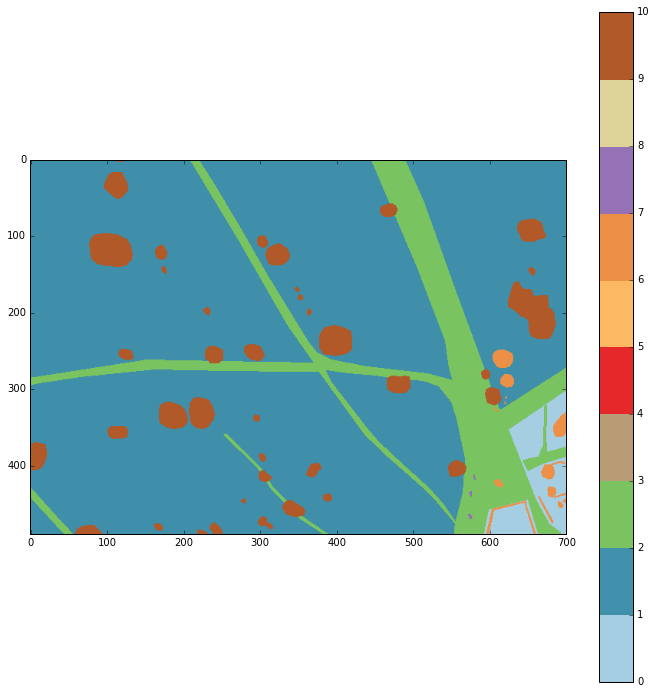

In [42]:
plt.figure(figsize=(12,12))
plt.imshow(img[10:500, 250:950], cmap=plt.get_cmap('Paired', 10))
plt.colorbar()

In [43]:
out = generate_label_image2(image_id)
out.shape

(3348, 3391, 11)

In [35]:
import cv2 

def generate_label_image2(image_id):
    rpolygons = get_resized_polygons(image_id, 'pan')
    out_size = get_image_data(image_id, 'pan', return_shape_only=True)
    out = np.zeros(out_size[:2] + (len(LABELS), ), np.uint8)
    out[:,:,0] = 1
    round_coords = lambda x: np.array(x).round().astype(np.int32)
    for class_type in range(1, len(LABELS)):
        if class_type not in rpolygons:
            continue
        one_class_mask = np.zeros(out_size[:2], np.uint8)
        for polygon in rpolygons[class_type]:
            exterior = [round_coords(polygon.exterior.coords)]
            cv2.fillPoly(one_class_mask, exterior, 1)
            if len(polygon.interiors) > 0:
                interiors = [round_coords(poly.coords) for poly in polygon.interiors]
                cv2.fillPoly(one_class_mask, interiors, 0)
        out[:,:,class_type] = one_class_mask
        out[:,:,0] -= one_class_mask
    return out

In [33]:
from visu_utils import display_img_1b

In [44]:
def display_labels_11(label_img_11, roi=None, ax_array=None, show_legend=True, **kwargs):
    if roi is not None:
        # roi is [minx, miny, maxx, maxy]
        x,y,xw,yh = roi
        label_img_11 = label_img_11[y:yh,x:xw,:]
    
    cmap = 'gray' # plt.get_cmap('Paired', 10)

    for i, l in enumerate(LABELS):
        plt.subplot(4,3,i+1)
        display_img_1b(label_img_11[:,:,i], **kwargs)
        plt.title(LABELS[i])

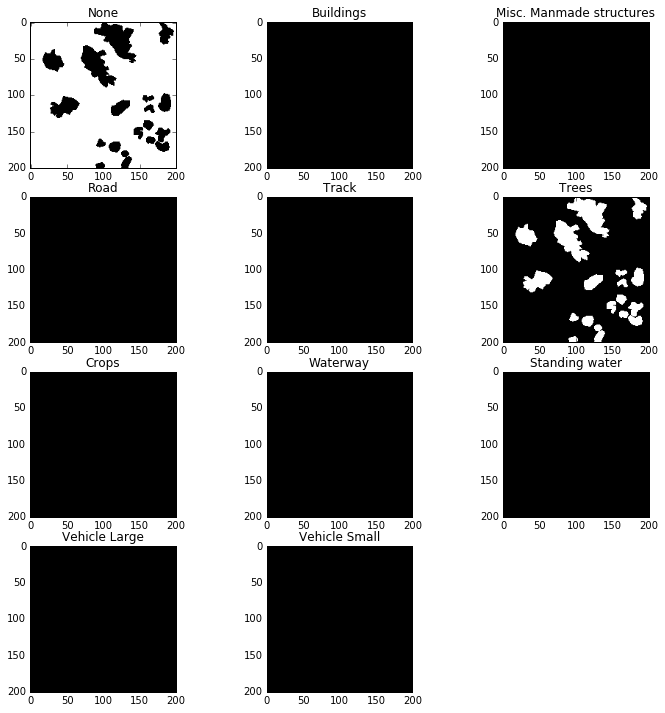

In [45]:
plt.figure(figsize=(12,12))
display_labels_11(out, [0,0,200,200])

In [ ]:
out = generate_label_image(image_id)

In [37]:
import cv2

def generate_label_file(image_id):
    image_data = generate_label_image(image_id)
    outfname = get_filename(image_id, 'label')
    cv2.imwrite(outfname, image_data)

def generate_label_image(image_id):
    rpolygons = get_resized_polygons(image_id, 'pan')
    out_size = get_image_data(image_id, 'pan', return_shape_only=True)
    out = np.zeros(out_size[:2], np.uint8)
    round_coords = lambda x: np.array(x).round().astype(np.int32)    
    for i, class_type in enumerate(ORDERED_LABEL_IDS):
        if class_type not in rpolygons:
            continue
        one_class_mask = np.zeros(out_size[:2], np.uint8)
        for polygon in rpolygons[class_type]:
            exterior = [round_coords(polygon.exterior.coords)]
            cv2.fillPoly(one_class_mask, exterior, i)
            if len(polygon.interiors) > 0:
                interiors = [round_coords(poly.coords) for poly in polygon.interiors]
                cv2.fillPoly(one_class_mask, interiors, 0)
        out = np.maximum(out, one_class_mask)
    return out

In [35]:
image_id = "6120_2_2"
out = generate_label_image(image_id)
out.shape, out.min(), out.max()

((3348, 3403), 0, 10)

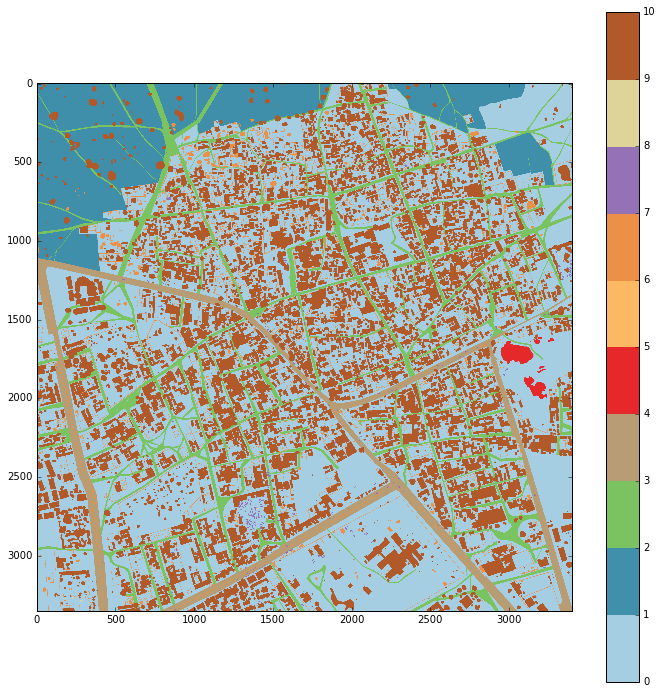

In [36]:
plt.figure(figsize=(12,12))
plt.imshow(out, cmap=plt.get_cmap('Paired', 10))
plt.colorbar()

In [133]:
plt.imsave('test.png', out, cmap=plt.get_cmap('Paired', 10))

In [72]:
exterior.T.shape, exterior.dtype

((2L, 5L), dtype('int32'))

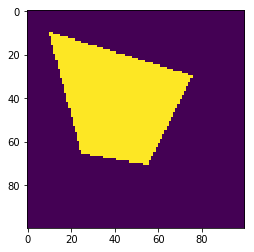

In [78]:
tst = np.zeros((100, 100), dtype=np.uint8)
exterior = np.array([[10, 10], [75, 30], [55, 70], [25, 65], [10, 10]]).astype(np.int32)
cv2.fillPoly(tst, [exterior], 255)
# cv2.polylines(tst, [exterior], True, (255,255,255)) 

plt.imshow(tst)

In [161]:
import shutil

from data_utils import TRAIN_IMAGE_IDS, get_resized_polygons
from image_utils import get_filename, generate_pansharpened, generate_label_file 

for image_id in TRAIN_IMAGE_IDS:
    print image_id
    # Generate pansharpened
    #generate_pansharpened(image_id, 'ms')
    #generate_pansharpened(image_id, 'swir')
    
    # generate label mask
    generate_label_file(image_id)
    

# shutil.copy()

6040_2_2
6120_2_2
6120_2_0
6090_2_0
6040_1_3
6040_1_0
6100_1_3
6010_4_2
6110_4_0
6140_3_1
6110_1_2
6100_2_3
6150_2_3
6160_2_1
6140_1_2
6110_3_1
6010_4_4
6170_2_4
6170_4_1
6170_0_4
6060_2_3
6070_2_3
6010_1_2
6040_4_4
6100_2_2


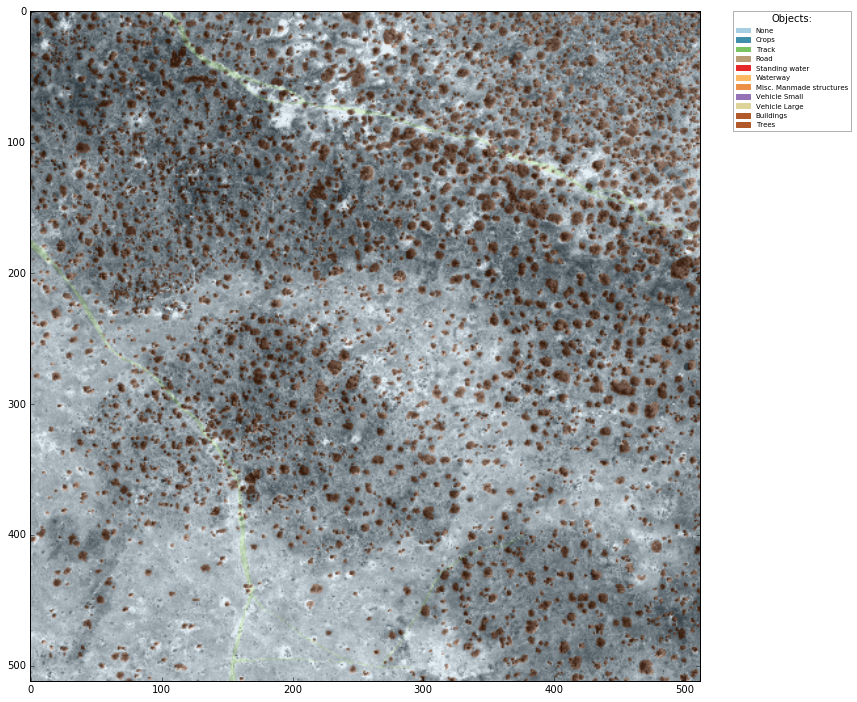

In [244]:
from visu_utils import display_labels
from data_utils import generate_label_file

generate_label_file(TRAIN_IMAGE_IDS[0], multi_dim=False)

# Check image size reduction to 512
img_pan = get_image_data(TRAIN_IMAGE_IDS[0], 'pan')
img_label = get_image_data(TRAIN_IMAGE_IDS[0], 'label_1d')
img_pan_resized = cv2.resize(img_pan, dsize=(512, 512), interpolation=cv2.INTER_CUBIC)
img_label_resized = cv2.resize(img_label, dsize=(512, 512), interpolation=cv2.INTER_NEAREST)
plt.figure(figsize=(12,12))
display_img_1b(img_pan_resized)
display_labels(img_label_resized, alpha=0.3)

## Compare panchro and SWIR

In [3]:
import sys
sys.path.append("../common/")

from data_utils import TRAIN_IMAGE_IDS, get_resized_polygons, generate_label_image, ORDERED_LABEL_IDS, LABELS
from image_utils import get_filename, generate_pansharpened, get_image_data

In [4]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [5]:
from visu_utils import display_img_1b
import cv2

In [6]:
TRAIN_IMAGE_IDS

array(['6040_2_2', '6120_2_2', '6120_2_0', '6090_2_0', '6040_1_3',
       '6040_1_0', '6100_1_3', '6010_4_2', '6110_4_0', '6140_3_1',
       '6110_1_2', '6100_2_3', '6150_2_3', '6160_2_1', '6140_1_2',
       '6110_3_1', '6010_4_4', '6170_2_4', '6170_4_1', '6170_0_4',
       '6060_2_3', '6070_2_3', '6010_1_2', '6040_4_4', '6100_2_2'], dtype=object)

In [52]:
np.random.randint(6)

4

In [99]:
def check_alignment(img_pan, img_swir, do_align=False, **kwargs):
        
    roi=[0, 0, 500, 500]
    rroi=[1200, 1500, 1700, 2000]
    rrroi=[500, 100, 700, 400]
    channel = 1 if 'channel' not in kwargs else kwargs['channel']
    warp_mode = cv2.MOTION_TRANSLATION if 'warp_mode' not in kwargs else kwargs['warp_mode']
    img_swir_aligned = None
    
    if do_align:
        
        img_swir_aligned = compute_aligned_image(img_pan, img_swir)
#         roi=[0,0,500,500]
#         img_swir_aligned = align_images(img_pan, img_swir, roi=roi, warp_mode=warp_mode)
#         counter = 5
#         while img_swir_aligned is None:
#             roi[0] = np.random.randint(6) * 500
#             roi[1] = np.random.randint(6) * 500
#             roi[2] += roi[0]
#             roi[3] += roi[1]
#             img_swir_aligned = align_images(img_pan, img_swir, roi=roi, warp_mode=warp_mode)
#             counter -= 1
#             if counter == 0:
#                 logging.warn("")
#                 break
#         if img_swir_aligned is None:
#             img_swir_aligned = img_swir.copy()
            
        img_swir_aligned = cv2.resize(img_swir_aligned, dsize=(img_pan.shape[1], img_pan.shape[0]), interpolation=cv2.INTER_NEAREST)
    
    img_swir_resized = cv2.resize(img_swir, dsize=(img_pan.shape[1], img_pan.shape[0]), interpolation=cv2.INTER_NEAREST)
    
    def _plot(img_pan, img_swir_resized, roi, channel, img_swir_aligned=None):
        ll = 3 if img_swir_aligned is None else 5
        plt.subplot(1,ll,1)
        display_img_1b(img_pan, roi)
        plt.title("Pancharpened")
        plt.subplot(1,ll,2)
        display_img_1b(img_swir_resized[:,:,channel], roi)
        plt.title("SWIR resized")

        if img_swir_aligned is not None:
            plt.subplot(1,ll,3)
            display_img_1b(img_swir_aligned[:,:,channel], roi)
            plt.title("SWIR resized aligned")
            
        i = 0 if img_swir_aligned is None else 1
        plt.subplot(1,ll,3 + i)
        display_img_1b(img_pan, roi)
        display_img_1b(img_swir_resized[:,:,channel], roi, alpha=0.5)
        plt.title("Pan + SWIR resized")
        
        if img_swir_aligned is not None:
            plt.subplot(1,ll,5)
            display_img_1b(img_pan, roi)
            display_img_1b(img_swir_aligned[:,:,channel], roi, alpha=0.5)
            plt.title("Pan + SWIR resized aligned")
            
    
    plt.figure(figsize=(12,8))
    _plot(img_pan, img_swir_resized, roi, channel, img_swir_aligned)
    plt.figure(figsize=(12,8))
    _plot(img_pan, img_swir_resized, rroi, channel, img_swir_aligned)
    plt.figure(figsize=(12,8))    
    _plot(img_pan, img_swir_resized, rrroi, channel, img_swir_aligned)


In [7]:
counter = 0

6100_2_3


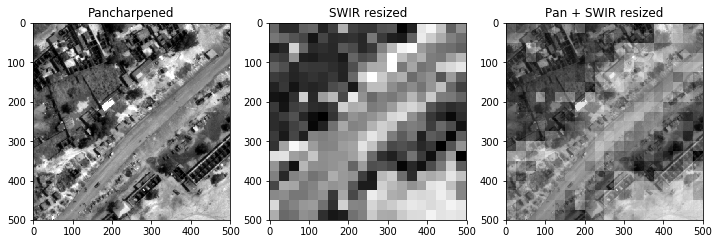

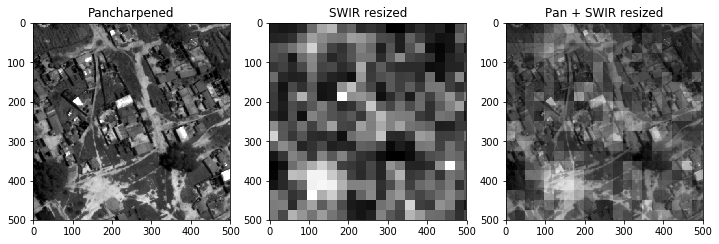

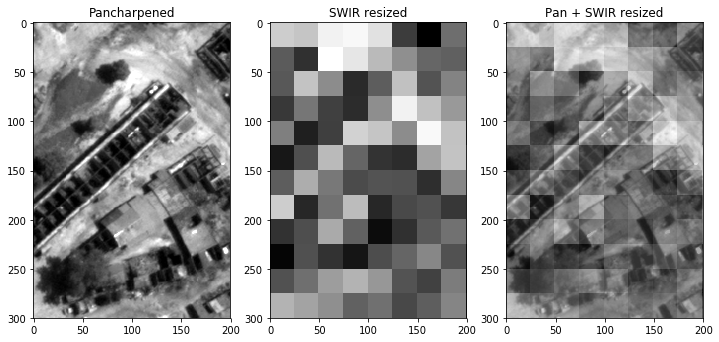

In [36]:
# image_id = "6120_2_2"
# image_id = "6040_2_2"
# image_id = "6040_1_0"
# image_id = "6120_2_0"
# image_id = "6110_3_1"

image_id = TRAIN_IMAGE_IDS[counter]
counter += 1
print image_id

img_pan = get_image_data(image_id, 'pan')
img_ms = get_image_data(image_id, 'ms')
img_swir = get_image_data(image_id, 'swir')

# check_alignment(img_pan, img_ms, channel=7)    
check_alignment(img_pan, img_swir, channel=1)    

In [11]:
# warp_matrix = np.eye(2, 3, dtype=np.float32)

# warp_matrix[0, 2] = -2.25
# # warp_matrix[1, 2] = -0.75
# print warp_matrix

# for i in range(img_swir.shape[2]):
#     img_swir[:,:,i] = cv2.warpAffine(img_swir[:,:,i], 
#                                      warp_matrix, 
#                                      (img_swir.shape[1], img_swir.shape[0]), 
#                                      flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP,
#                                      borderMode=cv2.BORDER_REFLECT
#                                     )

In [12]:
def get_gradient(im) :
    # Calculate the x and y gradients using Sobel operator
    grad_x = cv2.Sobel(im,cv2.CV_32F,1,0,ksize=3)
    grad_y = cv2.Sobel(im,cv2.CV_32F,0,1,ksize=3)
 
    # Combine the two gradients
    grad = cv2.addWeighted(np.absolute(grad_x), 0.5, np.absolute(grad_y), 0.5, 0)
    return grad

def get_binary(im, alpha=0.1):
    min_value, max_value, _, _ = cv2.minMaxLoc(im)
    value_range = max_value - min_value
#     out = (min_value + 0.5*value_range) * np.ones_like(im)
    out = im.copy()
    out[im < min_value + alpha*value_range] = min_value
#     out[im > max_value - alpha*value_range] = max_value
    return out
    

# img_pan_grad = get_gradient(img_pan)
# plt.figure(figsize=(12,6))
# display_img_1b(img_pan_grad, roi)

# roi=[1200, 1500, 1700, 2000]
# roi2 = [r/4/6 for r in roi]

# img_pan_resized = cv2.resize(img_pan, dsize=(img_swir.shape[1], img_swir.shape[0]))

# plt.figure(figsize=(12,6))
# plt.subplot(121)
# display_img_1b(get_binary(img_pan_resized), roi2)
# plt.subplot(122)
# display_img_1b(get_binary(img_swir[:,:,0]), roi2)

# plt.figure(figsize=(12,6))
# plt.subplot(121)
# display_img_1b(img_pan_resized, roi2)
# plt.subplot(122)
# display_img_1b(img_swir[:,:,0], roi2)


In [87]:
# Alignment :
from image_utils import align_images, compute_aligned_image

# def align_images(img_master, img_slave, roi, warp_mode=cv2.MOTION_EUCLIDEAN):
#     """
#     Code taken from http://www.learnopencv.com/image-alignment-ecc-in-opencv-c-python/
#     """
#     fx = img_master.shape[1] * 1.0 / img_slave.shape[1]
#     fy = img_master.shape[0] * 1.0 / img_slave.shape[0]    
#     roi_slave = [int(roi[0] / fx), int(roi[1] / fy), int(roi[2] / fx), int(roi[3] / fy)]        
    
# #     print fx, fy, roi_slave, roi
    
#     img_slave_roi = img_slave[roi_slave[1]:roi_slave[3],roi_slave[0]:roi_slave[2], :].astype(np.float32)
    
#     img_master_roi = img_master[roi[1]:roi[3],roi[0]:roi[2]].astype(np.float32)
#     img_master_roi = cv2.resize(img_master_roi, dsize=(img_slave_roi.shape[1], img_slave_roi.shape[0]))

#     img_master_roi = get_gradient(img_master_roi)
#     img_slave_roi = get_gradient(img_slave_roi)
    
# #     plt.figure(figsize=(12,6))
# #     plt.subplot(121)
# #     display_img_1b(img_master_roi)
# #     plt.subplot(122)
# #     display_img_1b(img_slave_roi[:,:,0])
    
#     img_slave_aligned = np.zeros_like(img_slave)
    
#     # Set the warp matrix to identity.
#     if warp_mode == cv2.MOTION_HOMOGRAPHY :
#         warp_matrix = np.eye(3, 3, dtype=np.float32)
#     else :
#         warp_matrix = np.eye(2, 3, dtype=np.float32)
        
#     height, width, ll = img_slave.shape
#     for i in range(ll):
#         # Set the stopping criteria for the algorithm.
#         criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 5000,  1e-1)
#         try:
#             cc, warp_matrix = cv2.findTransformECC(img_master_roi, img_slave_roi[:,:,i], warp_matrix, warp_mode, criteria)

            
#             if warp_mode == cv2.MOTION_HOMOGRAPHY :
#                 # Use Perspective warp when the transformation is a Homography
#                 img_slave_aligned[:,:,i] = cv2.warpPerspective(img_slave[:,:,i], 
#                                                                warp_matrix, 
#                                                                (width, height), 
#                                                                flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP,
#                                                                borderMode=cv2.BORDER_REFLECT
#                                                               )
#             else :
#                 # Use Affine warp when the transformation is not a Homography
#                 img_slave_aligned[:,:,i] = cv2.warpAffine(img_slave[:,:,i], 
#                                                           warp_matrix, 
#                                                           (width, height), 
#                                                           flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP,
#                                                           borderMode=cv2.BORDER_REFLECT
#                                                          );
#         except Exception as e:
#             print "Failed to find warp matrix: ", str(e)
#             return None
            
#     return img_slave_aligned

mean_warp_matrix :
[[ 1.          0.         -0.29083392]
 [ 0.          1.         -0.54880238]]


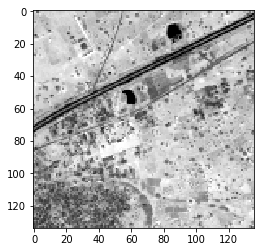

In [92]:
image_id = "6110_3_1"

img_pan = get_image_data(image_id, 'pan')
img_swir = get_image_data(image_id, 'swir')
res = compute_aligned_image(img_pan, img_swir)

if res is not None:
    plt.figure()
    display_img_1b(res[:,:,0])

In [107]:
counter = 0

In [105]:
counter -= 2

6100_2_2 25


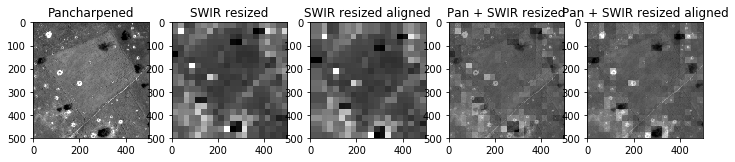

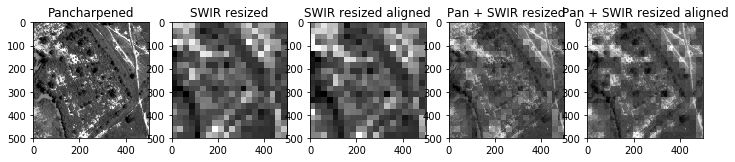

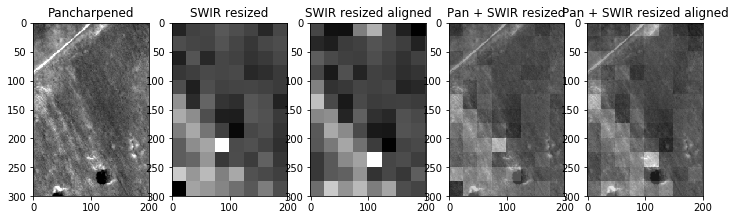

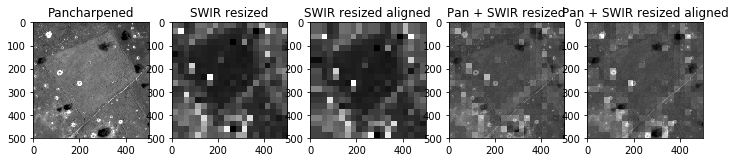

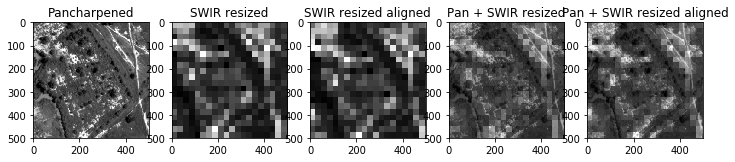

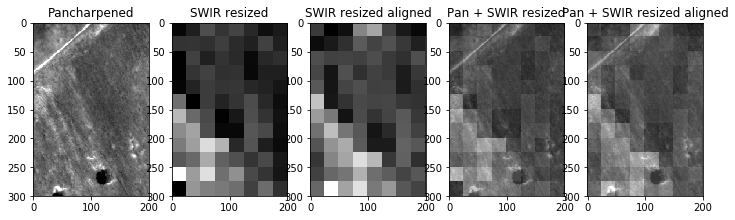

In [134]:
image_id = TRAIN_IMAGE_IDS[counter]
counter += 1
print image_id, counter

img_pan = get_image_data(image_id, 'pan')
img_swir = get_image_data(image_id, 'swir')
check_alignment(img_pan, img_swir, do_align=True, channel=1, warp_mode=cv2.MOTION_TRANSLATION)
check_alignment(img_pan, img_swir, do_align=True, channel=7, warp_mode=cv2.MOTION_TRANSLATION)

Test method "Generate aligned swir file"

In [135]:
import os
from image_utils import generate_aligned_swir, generate_pansharpened

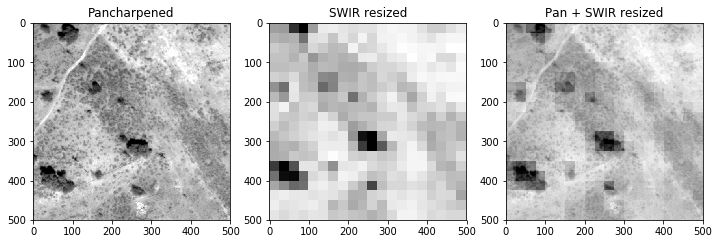

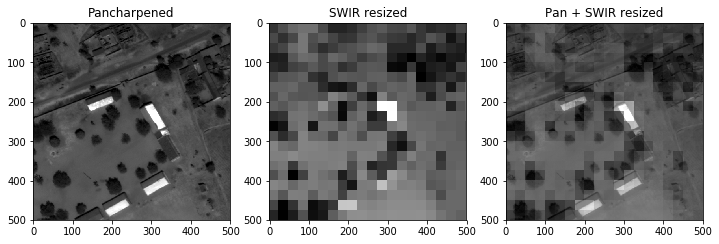

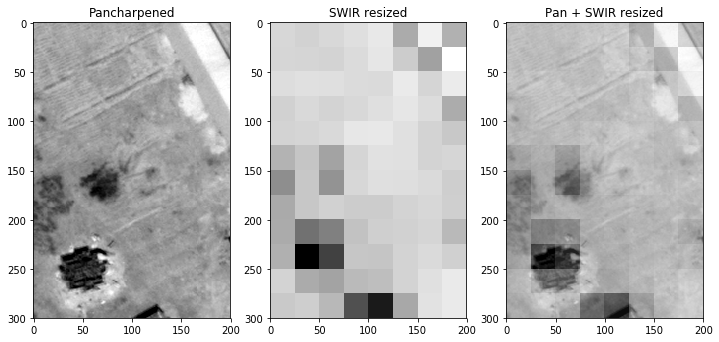

In [137]:
image_id = "6110_3_1"
img_pan = get_image_data(image_id, 'pan')
img_swir = get_image_data(image_id, 'swir')
check_alignment(img_pan, img_swir, do_align=False, channel=1)

In [138]:
os.remove(get_filename(image_id, "swir_aligned"))
generate_aligned_swir(image_id)
# from image_utils import align_images
# img_swir_aligned = align_images(img_pan, img_swir, roi=[0, 0, 500, 500], warp_mode=cv2.MOTION_EUCLIDEAN)

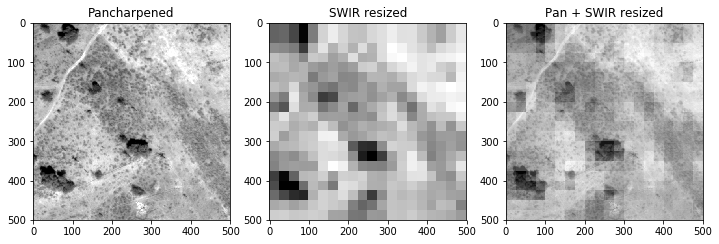

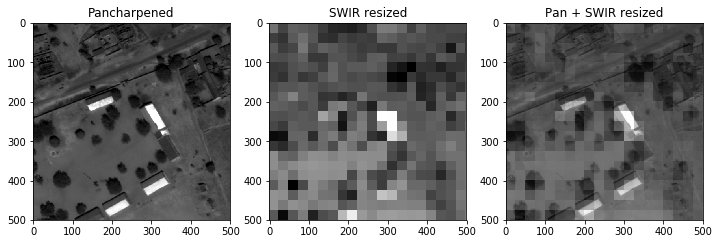

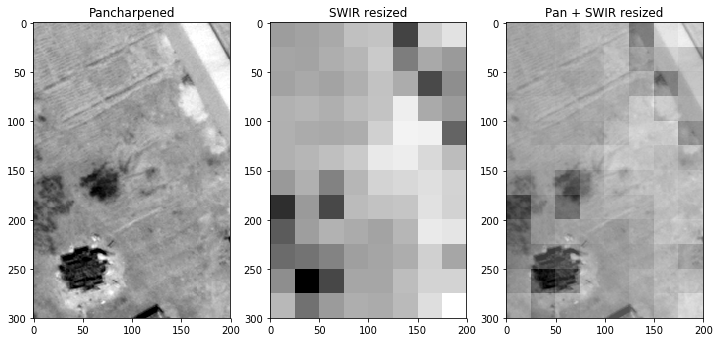

In [139]:
img_swir_aligned = get_image_data(image_id, 'swir_aligned')
check_alignment(img_pan, img_swir_aligned, do_align=False, channel=7)

In [38]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [39]:
from data_utils import TRAIN_IMAGE_IDS, get_resized_polygons, generate_label_file, LABELS
from image_utils import generate_pansharpened, imwrite, get_filename, generate_aligned_swir
from visu_utils import display_img_1b

from geo_utils.GeoImage import GeoImage
from geo_utils.GeoImageTiler import GeoImageTiler

In [46]:
# gimg_pan.close()
# gimg_ms.close()
# gimg_swir.close()
# gimg_label.close()

In [42]:
# image_id = TRAIN_IMAGE_IDS[0]
image_id = "6110_3_1"

tile_size = (512, 512)
overlapping = 64

# Generate aligned swir file
generate_aligned_swir(image_id)    
    
# Generate pansharpened
generate_pansharpened(image_id, 'ms')
generate_pansharpened(image_id, 'swir_aligned')
# Generate label image
generate_label_file(image_id)

gimg_pan = GeoImage(get_filename(image_id, 'pan'))
gimg_ms = GeoImage(get_filename(image_id, 'ms_pan'))
gimg_swir = GeoImage(get_filename(image_id, 'swir_pan'))
gimg_label = GeoImage(get_filename(image_id, 'label'))

gimg_pan_tiles = GeoImageTiler(gimg_pan, tile_size=tile_size, overlapping=overlapping, include_nodata=False, nodata_value=0.0)
gimg_ms_tiles = GeoImageTiler(gimg_ms, tile_size=tile_size, overlapping=overlapping, include_nodata=False, nodata_value=0.0)
gimg_swir_tiles = GeoImageTiler(gimg_swir, tile_size=tile_size, overlapping=overlapping, include_nodata=False, nodata_value=0.0)
gimg_label_tiles = GeoImageTiler(gimg_label, tile_size=tile_size, overlapping=overlapping, include_nodata=False, nodata_value=0.0)


(448L, 512L, 1L)
(448L, 512L, 8L) (448L, 512L, 8L) (448L, 512L, 11L)


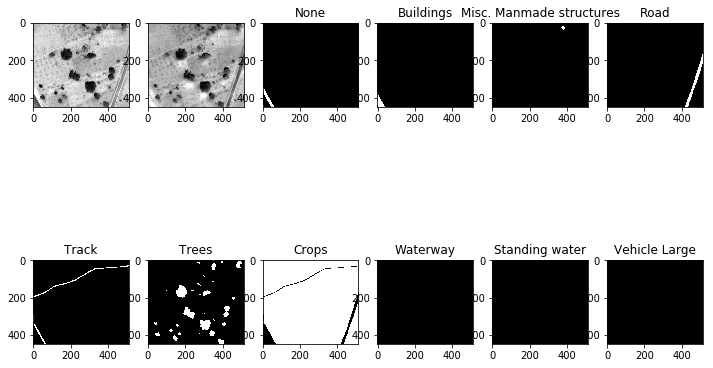

In [45]:
tile_info_pan = gimg_pan_tiles.next()
tile_info_ms = gimg_ms_tiles.next()
tile_info_swir =gimg_swir_tiles.next()
tile_info_label =gimg_label_tiles.next()

tile_pan, xoffset_pan, yoffset_pan = tile_info_pan
print tile_pan.shape
tile_ms, xoffset_ms, yoffset_ms = tile_info_ms
tile_swir, xoffset_swir, yoffset_swir = tile_info_swir
tile_label, xoffset_label, yoffset_label = tile_info_label
print tile_ms.shape, tile_swir.shape, tile_label.shape
plt.figure(figsize=(12,8))
plt.subplot(261)
display_img_1b(tile_ms[:,:,2])
plt.subplot(262)
display_img_1b(tile_swir[:,:,2])
for i in range(3,13):
    plt.subplot(2,6,i)
    display_img_1b(tile_label[:,:,i-3])
    plt.title(LABELS[i-3])

In [19]:
def op(x, y):
    return x ^ (x & y)

In [20]:
op(1, 1), op(1, 0), op(0, 1), op(0, 0)

(0, 1, 0, 0)

In [30]:
a = np.array([[1, 1], [1, 1]])
b = np.array([[1, 0], [0, 1]])
c = np.array([[1, 0], [0, 0]])

def opp(x, y):
    return np.bitwise_xor(x, np.bitwise_and(x, y))

print "a="
print a
d = opp(a, b)
print "b="
print b
print "d="
print d
d = opp(d, c)
print "c="
print c
print "d="
print d

a=
[[1 1]
 [1 1]]
b=
[[1 0]
 [0 1]]
d=
[[0 1]
 [1 0]]
c=
[[1 0]
 [0 0]]
d=
[[0 1]
 [1 0]]


In [ ]:
def get_patches(img, msk, amt=10000, aug=True):
    is2 = int(1.0 * ISZ)
    xm, ym = img.shape[0] - is2, img.shape[1] - is2

    x, y = [], []

    tr = [0.4, 0.1, 0.1, 0.15, 0.3, 0.95, 0.1, 0.05, 0.001, 0.005]
    for i in range(amt):
        xc = random.randint(0, xm)
        yc = random.randint(0, ym)

        im = img[xc:xc + is2, yc:yc + is2]
        ms = msk[xc:xc + is2, yc:yc + is2]

        for j in range(N_Cls):
            sm = np.sum(ms[:, :, j])
            if 1.0 * sm / is2 ** 2 > tr[j]:
                if aug:
                    if random.uniform(0, 1) > 0.5:
                        im = im[::-1]
                        ms = ms[::-1]
                    if random.uniform(0, 1) > 0.5:
                        im = im[:, ::-1]
                        ms = ms[:, ::-1]

                x.append(im)
                y.append(ms)

    x, y = 2 * np.transpose(x, (0, 3, 1, 2)) - 1, np.transpose(y, (0, 3, 1, 2))
    print x.shape, y.shape, np.amax(x), np.amin(x), np.amax(y), np.amin(y)
    return x, y

In [ ]:
import 